In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# OJO que consume mucha memoria
df = pd.read_csv("Data/status.csv")

In [3]:
# Convierto el campo time en datetime
df.time = pd.to_datetime(df.time) 

print df


          station_id  bikes_available  docks_available                time
0                  2                2               25 2013-08-29 12:06:01
1                  2                2               25 2013-08-29 12:07:01
2                  2                2               25 2013-08-29 12:08:01
3                  2                2               25 2013-08-29 12:09:01
4                  2                2               25 2013-08-29 12:10:01
5                  2                2               25 2013-08-29 12:11:01
6                  2                2               25 2013-08-29 12:12:01
7                  2                2               25 2013-08-29 12:13:01
8                  2                2               25 2013-08-29 12:15:01
9                  2                2               25 2013-08-29 12:16:02
10                 2                2               25 2013-08-29 12:18:01
11                 2                2               25 2013-08-29 12:19:01
12                 2     

In [4]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71984434 entries, 0 to 71984433
Data columns (total 4 columns):
station_id         71984434 non-null int64
bikes_available    71984434 non-null int64
docks_available    71984434 non-null int64
time               71984434 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.1 GB


In [5]:
df.describe()

,station_id,bikes_available,docks_available
count,7.198443e+07,7.198443e+07,7.198443e+07
mean,4.253149e+01,8.394812e+00,9.284729e+00
std,2.376117e+01,3.993586e+00,4.175442e+00
min,2.000000e+00,0.000000e+00,0.000000e+00
25%,2.400000e+01,6.000000e+00,6.000000e+00
50%,4.200000e+01,8.000000e+00,9.000000e+00
75%,6.300000e+01,1.100000e+01,1.200000e+01
max,8.400000e+01,2.700000e+01,2.700000e+01


In [ ]:
#days = {'Monday':'0', 'Tuesday':'1','Wednesday':'2', 'Thursday':'3', 'Friday':'4', 'Saturday':'5', 'Sunday':'6'}
#def weekday_and_hour(x):
#    return (days[x.weekday_name] + str(x.hour))

#df['weekday_and_hour'] = df['time'].apply(weekday_and_hour)

#df.groupby(lambda x: df[df.index == x].time.dt.year).size()


In [6]:
# Agrego el campo weekday y hour, y elimino time para liberar un poco la memoria
df['weekday'] =  pd.to_datetime(df['time']).dt.weekday
df['hour'] = pd.to_datetime(df['time']).dt.hour
df = df.drop('time', 1)

In [7]:
# Esto va a servir mas adelante para graficar
days = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
labels = []
for day in days:
    for h in range(12):
        labels.append(day + ' - ' + str(h*2))

Segun otro análisis exploratorio que se hizo (TrafficStationAnalisys), elijo 2 de las estaciones mas usadas, 2 del medio y 2 de las menos usadas para graficar como varía la disponibilidad de bicicletas durante los días de la semana.

Mas usadas: 70, 69
En el medio: 28, 46
Menos usadas: 21, 24
(los números son ids)

In [8]:
# Estación 70
df_station = df[df.station_id == 70]
print df_station
#dfGrouped = df.groupby(['weekday',df.hour-(df.hour%2)])['bikes_available'].count()
#print dfGrouped

          station_id  bikes_available  docks_available  weekday  hour
14758702          70                0               19        3    12
14758703          70                0               19        3    12
14758704          70                0               19        3    12
14758705          70                0               19        3    12
14758706          70                0               19        3    12
14758707          70                0               19        3    12
14758708          70                0               19        3    12
14758709          70                0               19        3    12
14758710          70                0               19        3    12
14758711          70                0               19        3    12
14758712          70                0               19        3    12
14758713          70                1               18        3    12
14758714          70                1               18        3    12
14758715          70

In [9]:
dfGrouped = df_station.groupby(['weekday',df_station.hour-(df_station.hour%2)])['bikes_available'].mean()
print dfGrouped

weekday  hour
0        0       12.972193
         2       12.995700
         4       13.047342
         6       11.013932
         8        4.350068
         10       4.656974
         12       5.774140
         14       6.310770
         16      10.567208
         18      13.104953
         20      12.804606
         22      13.707259
1        0       13.739743
         2       13.731449
         4       13.787942
         6       11.639498
         8        3.949011
         10       4.336963
         12       6.084587
         14       7.063906
         16      11.702678
         18      13.319510
         20      12.502312
         22      13.845766
2        0       13.972641
         2       14.035401
         4       14.093351
         6       12.195013
         8        4.747454
         10       3.439424
                   ...    
4        12       5.836896
         14       7.205592
         16      10.827782
         18      11.075239
         20      10.947545
         22   

<IPython.core.display.Javascript object>


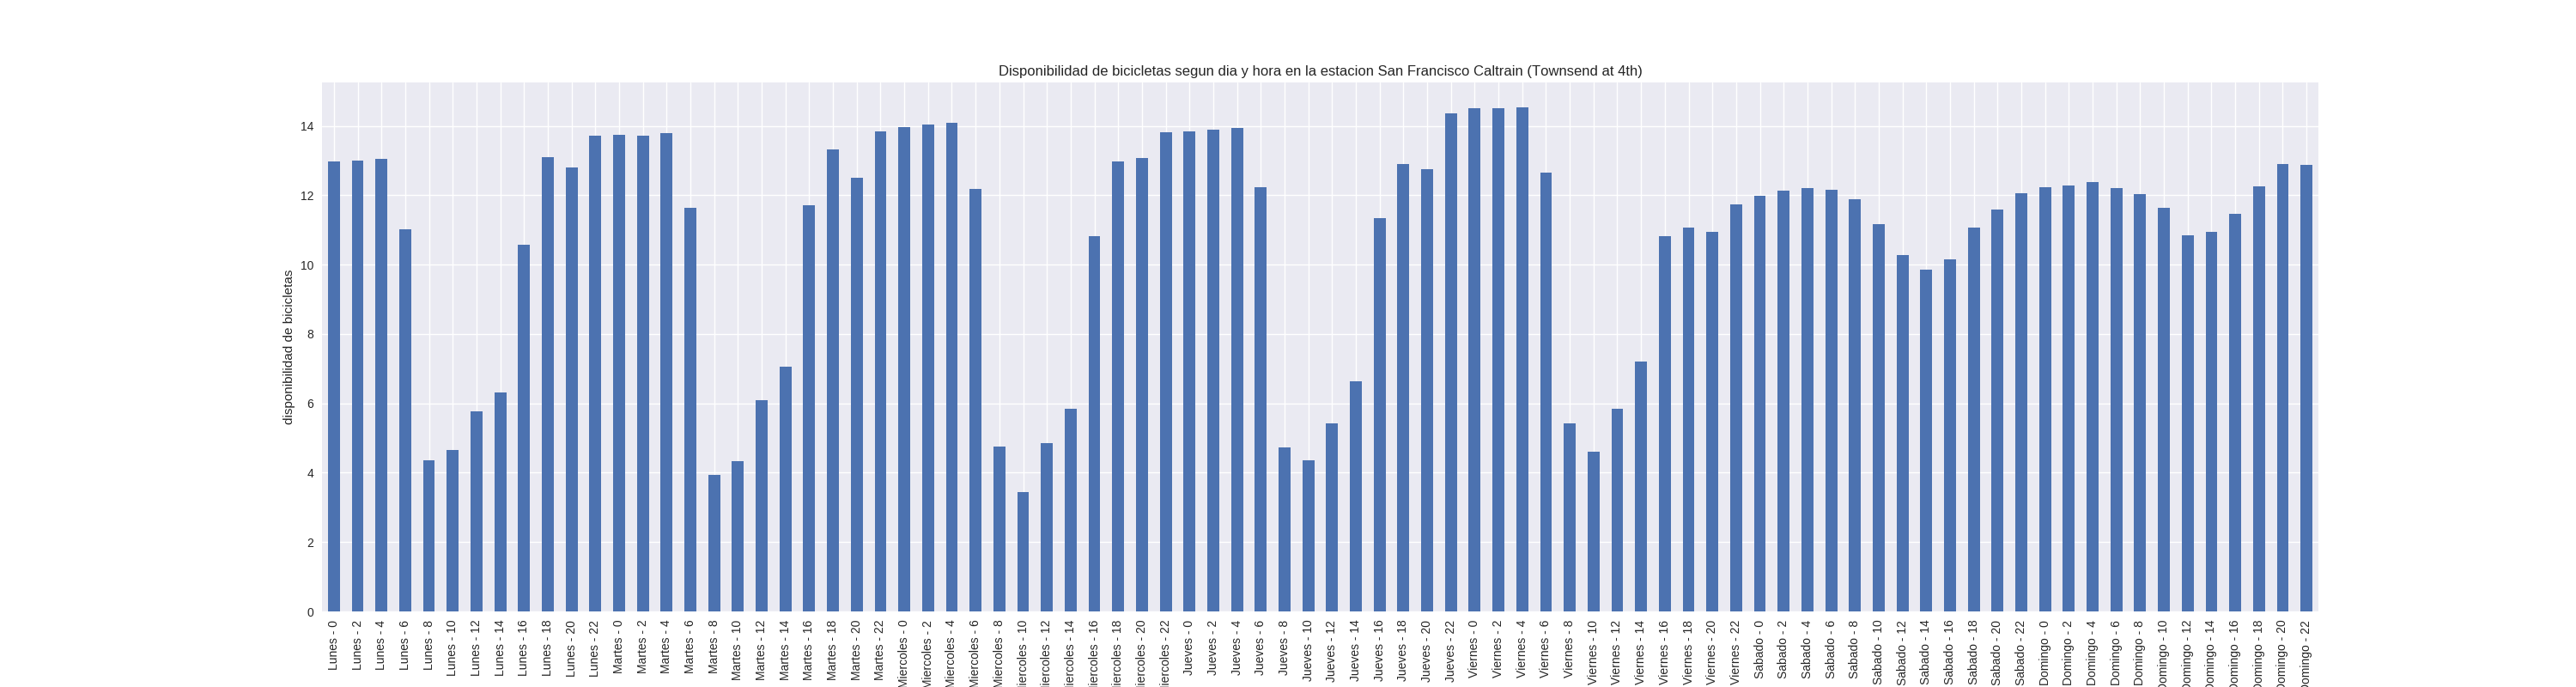

In [11]:
plt.figure()
dfGrouped.plot(kind='bar',figsize=(30,8), title="Disponibilidad de bicicletas segun dia y hora en la estacion San Francisco Caltrain (Townsend at 4th)").set_xticklabels(labels)
plt.xlabel("dia - hora")
plt.ylabel("disponibilidad de bicicletas")

In [ ]:
# Estación 69
df_station = df[df.station_id == 69]
dfGrouped = df_station.groupby(['weekday',df_station.hour-(df_station.hour%2)])['bikes_available'].mean()
plt.figure()
dfGrouped.plot(kind='bar',figsize=(30,8), title="Disponibilidad de bicicletas segun dia y hora San Francisco Caltrain 2 (330 Townsend)").set_xticklabels(labels)
plt.xlabel("dia - hora")
plt.ylabel("disponibilidad de bicicletas")

In [ ]:
# Estación 28
df_station = df[df.station_id == 28]
dfGrouped = df_station.groupby(['weekday',df_station.hour-(df_station.hour%2)])['bikes_available'].mean()
plt.figure()
dfGrouped.plot(kind='bar',figsize=(30,8), title="Disponibilidad de bicicletas segun dia y hora Mountain View Caltrain Station").set_xticklabels(labels)
plt.xlabel("dia - hora")
plt.ylabel("disponibilidad de bicicletas")

In [ ]:
# Estación 46
df_station = df[df.station_id == 46]
dfGrouped = df_station.groupby(['weekday',df_station.hour-(df_station.hour%2)])['bikes_available'].mean()
plt.figure()
dfGrouped.plot(kind='bar',figsize=(30,8), title="Disponibilidad de bicicletas segun dia y hora Washington at Kearney").set_xticklabels(labels)
plt.xlabel("dia - hora")
plt.ylabel("disponibilidad de bicicletas")

In [ ]:
# Estación 21
df_station = df[df.station_id == 21]
dfGrouped = df_station.groupby(['weekday',df_station.hour-(df_station.hour%2)])['bikes_available'].mean()
plt.figure()
dfGrouped.plot(kind='bar',figsize=(30,8), title="Disponibilidad de bicicletas segun dia y hora Franklin at Maple").set_xticklabels(labels)
plt.xlabel("dia - hora")
plt.ylabel("disponibilidad de bicicletas")

In [ ]:
# Estación 24
df_station = df[df.station_id == 24]
dfGrouped = df_station.groupby(['weekday',df_station.hour-(df_station.hour%2)])['bikes_available'].mean()
plt.figure()
dfGrouped.plot(kind='bar',figsize=(30,8), title="Disponibilidad de bicicletas segun dia y hora Redwood City Public Library").set_xticklabels(labels)
plt.xlabel("dia - hora")
plt.ylabel("disponibilidad de bicicletas")

Según se pudo observar en los gráficos, las diferencias más notorias se dan en las estaciones que tienen más tráfico.

En las estaciones más usadas se nota una clara diferencia en la disponibilidad de las bicicletas entre las 8 y las 16 horas de los días hábiles, habiendo menos disponibilidad.
En las estaciones del medio la diferencia se sigue notando, pero ya no es tan marcada, mientras que en las estaciones menos usadas ya no se alcanza a notar un patron claro.

In [ ]:
df

In [ ]:
#df['lleno'] = df['bikes_available'] / (df['bikes_available'] + df['docks_available'])
#df['lleno'] = df['lleno']*100
#dfPlot = df[df.station_id == 70]
#dfPlot = dfPlot.loc[:,'lleno']

In [ ]:
#dfPlot.plot()
#plt.figure()
#with pd.plot_params.use('x_compat', True):
#    dfPlot.lleno.plot(color='r', figsize=(500,30))